In [1]:
from typing import TypedDict

In [4]:
class PortfolioState(TypedDict):
    amount_usd:float
    total_usd:float
    total_inr:float

In [6]:
my_obj: PortfolioState={
    "amount_usd": 100,
    "total_usd": 100,
    "total_inr": 34,
}

In [16]:
def cal_total(state: PortfolioState)->PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.08
    return state

In [17]:
def convert_inr(state: PortfolioState)->PortfolioState:
    state['total_inr'] = state['total_usd'] * 85
    return state

In [18]:
from langgraph.graph import StateGraph,START,END
builder=StateGraph(PortfolioState)
builder.add_node("Calc_total_node",cal_total)
builder.add_node("Convert_inr_node",convert_inr)

builder.add_edge(START,"Calc_total_node")
builder.add_edge("Calc_total_node","Convert_inr_node")
builder.add_edge("Convert_inr_node",END)
graph=builder.compile()

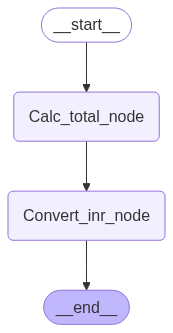

In [19]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
graph.invoke({"amount_usd":1000})

{'amount_usd': 1000, 'total_usd': 1080.0, 'total_inr': 91800.0}